In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import calendar
from scipy import stats
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
import plotly.graph_objs as go 
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()



In [ ]:
store = pd.read_csv('store.csv')
train = pd.read_csv('train.csv')

In [ ]:
store.head()

In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
train.head()

In [ ]:
store.info()

In [ ]:
store.drop_duplicates()
store.info()

In [ ]:
train.describe()

In [ ]:
store.describe()

In [9]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

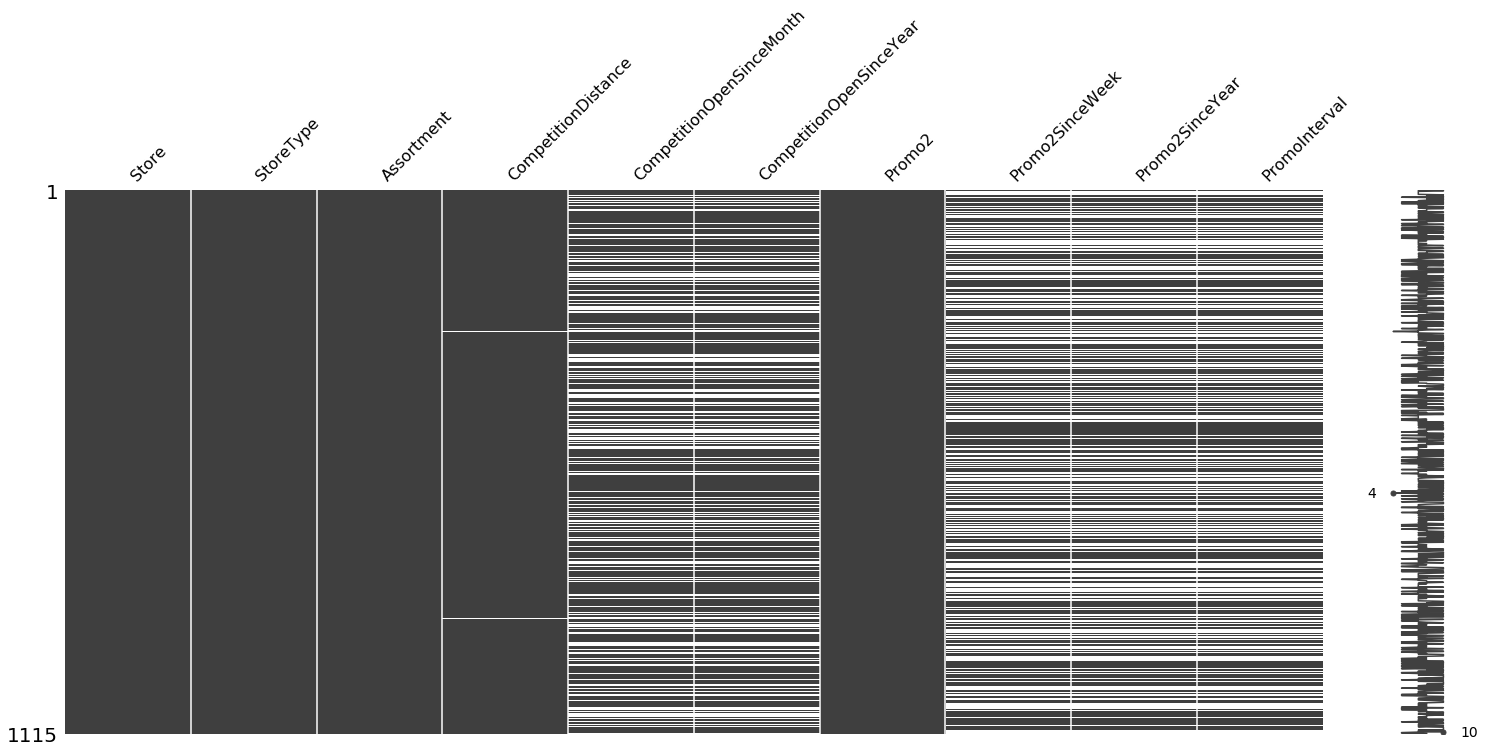

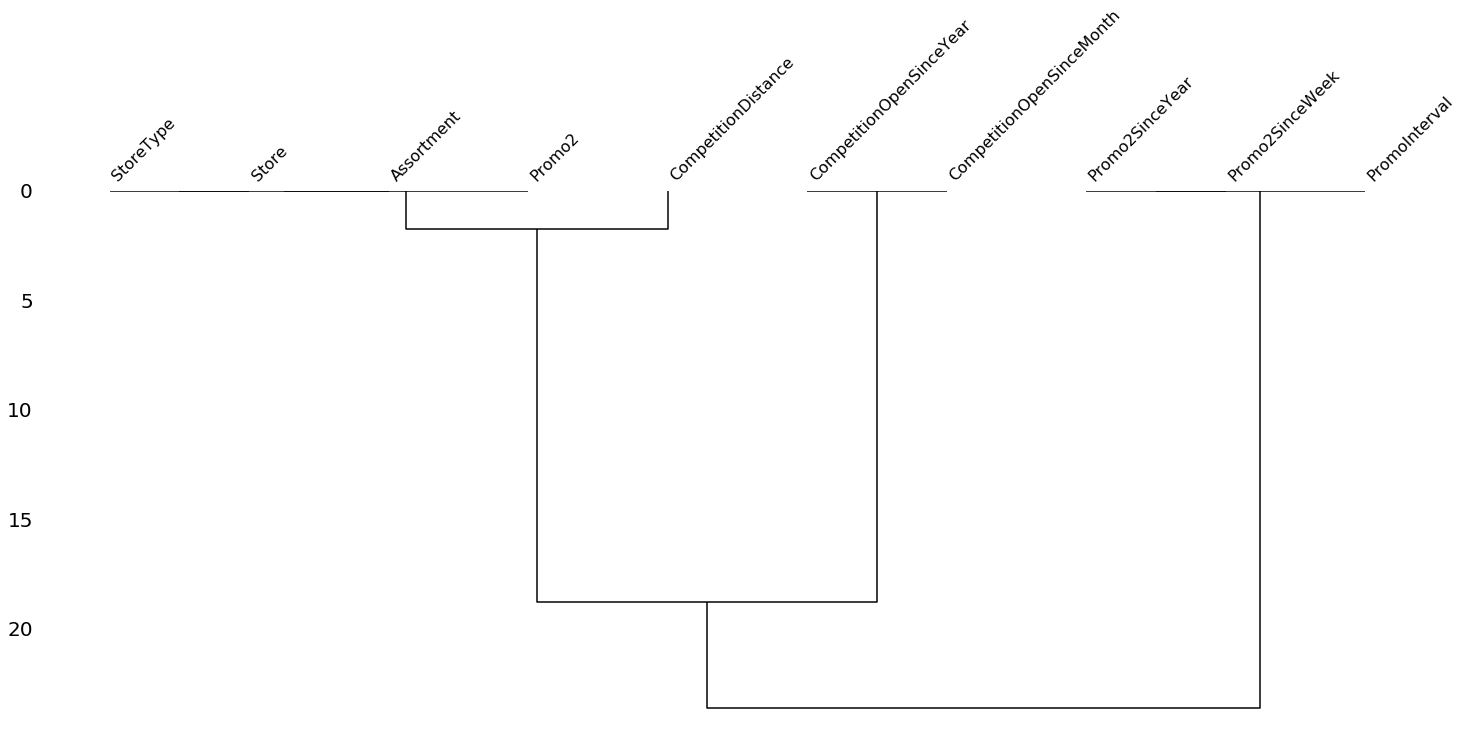

In [9]:
import missingno as msno
msno.matrix(store)
msno.dendrogram(store)

In [88]:
#clean up missing values for the store dataframe

#use the interpolate method of floats columns 
#store[store.columns[3:6]] = store[store.columns[3:6]].interpolate()
#store[store.columns[7:9]] = store[store.columns[7:9]].interpolate()

#ue the mean function for the remaining empty rows 

#store.fillna(store.mean())

store = store.dropna(axis=0)

store.isnull().sum()


Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [11]:
#clean up data for the train dataframe

In [10]:
train.isnull().sum()

#awsesome there is no empty values!!!! 

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:

train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]
train.info()

In [9]:
for col in ['StoreType','Assortment','Promo2']:
    store[col]= store[col].astype('category')


In [10]:
for col in ['Promo2']:
    store[col]= store[col].astype('bool')

In [11]:
for col in ['Open', 'Promo', 'StateHoliday','SchoolHoliday']:
    train[col]= train[col].astype('bool')

In [ ]:
store.info()

In [113]:
#change store type to string 

#train['Store'] = train['Store'].astype(str)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null bool
Promo            1017209 non-null bool
StateHoliday     1017209 non-null bool
SchoolHoliday    1017209 non-null bool
Month            1017209 non-null int64
Year             1017209 non-null int64
Day              1017209 non-null int64
Dayoftheweek     1017209 non-null object
Monthofyear      1017209 non-null object
dtypes: bool(4), datetime64[ns](1), int64(7), object(2)
memory usage: 81.5+ MB


In [12]:
train.drop_duplicates()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null bool
Promo            1017209 non-null bool
StateHoliday     1017209 non-null bool
SchoolHoliday    1017209 non-null bool
dtypes: bool(4), datetime64[ns](1), int64(4)
memory usage: 42.7 MB


**Create day related columns**

In [5]:
#add date related columns 
train['Month']=train['Date'].dt.month
train['Year']=train['Date'].dt.year
train['Day']=train['Date'].dt.day
train['Dayoftheweek']=train['Date'].dt.weekday_name

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
Month            1017209 non-null int64
Year             1017209 non-null int64
Day              1017209 non-null int64
Dayoftheweek     1017209 non-null object
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 100.9+ MB


In [6]:
look_up = {1: 'Jan', 2: 'Feb', 3: 'Mrch', 4: 'April', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct',11:'Nov',12: 'Dec'}


train['Monthofyear']  = train['Month'].apply(lambda x: look_up[x])
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,Dayoftheweek,Monthofyear
0,1,5,2015-07-31,5263,555,1,1,0,1,7,2015,31,Friday,Jul
1,2,5,2015-07-31,6064,625,1,1,0,1,7,2015,31,Friday,Jul
2,3,5,2015-07-31,8314,821,1,1,0,1,7,2015,31,Friday,Jul
3,4,5,2015-07-31,13995,1498,1,1,0,1,7,2015,31,Friday,Jul
4,5,5,2015-07-31,4822,559,1,1,0,1,7,2015,31,Friday,Jul


In [7]:
#Create a dataframe with the store id and the adequate sales
topshop =train [['Store','Sales']]


#Group by store
topshop = topshop.groupby('Store').sum()

#Sort the dataframe by order descending
topshop =topshop.sort_values('Sales', ascending=False)

#Grab the top 20 shops
topshop = topshop.head(20).reset_index()
topshop['Store']= topshop['Store'].astype('str')
#topshop.pivot_table(columns = 'Store', values ='Sales')

#plot it
#plt.figure(figsize = (12,6))
#sns.barplot(x='Store', y='Sales', data=topshop, sorted = False)


topshop.iplot(kind='bar', xTitle='Stores', yTitle='Sales', y='Sales', text = 'Store' )

** The relation between years and Month **

In [8]:
pt = train.pivot_table(index='Month', columns='Year', values ='Sales')
pt.iplot(kind='heatmap',colorscale='spectral',title='Cufflinks - Heatmap')

**The relation between the Days of the week and Month**

In [21]:
pt = train.pivot_table(index='Month', columns='Dayoftheweek', values ='Sales')
pt.iplot(kind='heatmap',colorscale='spectral',title='Cufflinks - Heatmap')

**The relation between the Months and the Day of the Month**

In [22]:
pt = train.pivot_table(index='Day', columns='Month', values ='Sales')
pt.iplot(kind='heatmap',colorscale='spectral',title='Cufflinks - Heatmap')

*** Revenue by store type ***


In [54]:
#Sum the train dataframe by store number summing up the others columns 
trainsumbystore = train.groupby('Store').sum().reset_index()
 
#Merge the two datasets 

mergedtable = pd.merge(trainsumbystore, store, on='Store')

salesstoretype= mergedtable[['StoreType', 'Sales']]
salesstoretype= salesstoretype.groupby('StoreType').sum().sort_values(by='Sales',ascending=False)
salesstoretype= salesstoretype.reset_index()



trace1 = go.Bar(
    x=salesstoretype[('StoreType')],
    y=salesstoretype[('Sales')],
    name='Name of Trace 1'
)

data = [trace1]

layout = go.Layout(
    title='Revenue generated by Shop Type',
    xaxis=dict(
        title='Store Type',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Sales',
        autorange = True,
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)

fig.iplot()
#plot_url = py.plot(fig, filename='styling-names')
                   
#salesstoretype.iplot(colorscale='spectral', kind= 'bar', y= 'Sales', layout=layout)

In [24]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,Dayoftheweek,Monthofyear
0,1,5,2015-07-31,5263,555,True,True,True,True,7,2015,31,Friday,Jul
1,2,5,2015-07-31,6064,625,True,True,True,True,7,2015,31,Friday,Jul
2,3,5,2015-07-31,8314,821,True,True,True,True,7,2015,31,Friday,Jul
3,4,5,2015-07-31,13995,1498,True,True,True,True,7,2015,31,Friday,Jul
4,5,5,2015-07-31,4822,559,True,True,True,True,7,2015,31,Friday,Jul


In [57]:
basketweek = train[['Dayoftheweek','Sales','Customers']]
basketweek = basketweek.groupby('Dayoftheweek').sum()
basketweek = basketweek.sort_values(by='Sales',ascending = False)
basketweek = basketweek.reset_index()
basketweek['Basket'] = basketweek['Sales'] / basketweek['Customers'] 

basketmonth = train[['Monthofyear','Sales','Customers']]
basketmonth = basketmonth.groupby('Monthofyear').sum()
basketmonth = basketmonth.sort_values(by='Sales',ascending = False)
basketmonth = basketmonth.reset_index()
basketmonth['Basket'] = basketmonth['Sales'] / basketmonth['Customers'] 



trace1 = go.Bar(
    x=basketweek[('Dayoftheweek')],
    y=basketweek[('Sales')],
    name='Sales'
    
)
trace2 = go.Scatter(
    x=basketweek[('Dayoftheweek')],
    y=basketweek[('Basket')],
    name='Average customer basket',
    yaxis='y2'
)

trace3 = go.Bar(
    x=basketmonth[('Monthofyear')],
    y=basketmonth[('Sales')],
    name='Sales',
    yaxis = 'y1'
)
trace4 = go.Scatter(
    x=basketmonth[('Monthofyear')],
    y=basketmonth[('Basket')],
    name='Average customer basket',
    yaxis='y2'
)


data = [[trace1, trace2], [trace3, trace4]]

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Plot 1', 'Plot 2'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)

layout = go.Layout(
    title='Average Customer Basket by day of the week',
    yaxis=dict(
        title='Sales'
    ),
    yaxis2=dict(
        title='Basket',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    )
)


fig['layout'].update(height=600, width=1200, title='Multiple Subplots' +' with Titles')

#py.iplot(fig, filename='make-subplots-multiple-with-titles')
#fig = go.Figure(data=data, layout=layout)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [58]:
#Create two new dataframe

basketweek = train[['Dayoftheweek','Sales','Customers']]
basketweek = basketweek.groupby('Dayoftheweek').sum()
basketweek = basketweek.sort_values(by='Sales',ascending = False)
basketweek = basketweek.reset_index()
basketweek['Basket'] = basketweek['Sales'] / basketweek['Customers'] 

basketmonth = train[['Monthofyear','Sales','Customers']]
basketmonth = basketmonth.groupby('Monthofyear').sum()
basketmonth = basketmonth.sort_values(by='Sales',ascending = False)
basketmonth = basketmonth.reset_index()
basketmonth['Basket'] = basketmonth['Sales'] / basketmonth['Customers'] 


#Create the format of our plot grid

fig = tools.make_subplots(rows=1,
                          cols=2,
                          print_grid=True,
                          horizontal_spacing=0.18,
                         )

#Define the 4 traces 

trace1 = dict(type='bar',
              x= basketweek[('Dayoftheweek')], 
              y= basketweek[('Sales')],
              name='Sales',            
              marker=dict(color= 'rgba(220,49,72, 0.8)', 
                          line= dict(width= 1)),
              showlegend=False
             )
 

trace2 = dict(type='scatter',
              x= basketweek[('Dayoftheweek')], 
              y= basketweek[('Basket')], 
              marker= dict(line= dict(width= 1), 
                           size= 8), 
              line=dict(color= '#B0122C',
                        width= 1.5),
              name= 'AOV',
              showlegend=False
             )


trace3=dict(type='bar',
            x=basketmonth[('Monthofyear')],
            y=basketmonth[('Sales')],
            name='Sales',
            marker=dict(color= 'rgba(220,49,72, 0.8)', line= dict(width= 1)),
            showlegend=False 
          )
trace4=dict(type='scatter',
            x= basketmonth[('Monthofyear')],
            y=basketmonth[('Basket')],
            marker= dict(line= dict(width= 1), 
                         size= 8), 
            line=dict(color= '#B0122C', width= 1.5),
            name= 'AOV',
            showlegend=False
           )

# Append the first two traces to subplot (1,1), and the last two, to subplot (1,2):

fig.append_trace(trace1, 1, 1)# trace1 is in position 0 of the list fig['data]
fig.append_trace(trace2, 1, 1)#                       1 
fig.append_trace(trace3, 1, 2)#                       2
fig.append_trace(trace4, 1, 2)#                       3

# Now we update yaxis for both trace2 and trace4 - meaning positon 1 and 3
fig['data'][1].update(yaxis='y3')
fig['data'][3].update(yaxis='y4')

# Update layout


fig['layout'].update(autosize= False, 
              width= 800, 
              height= 500, 
              showlegend=False,
              hovermode='x')


fig['layout']['xaxis1'].update(tickangle= -45, #'x1'
                         autorange=True,
                         tickfont=dict(size= 10), 
                         title= 'Days of the Week', 
                         type= 'category',
                         )
fig['layout']['yaxis1'].update( #left yaxis'y1
                         showgrid=True, 
                         title= 'Sales',
                         )

#Insert a new key, yaxis3, and the associated value:
fig['layout']['yaxis3']=dict(
                          overlaying= 'y1', 
                          anchor= 'x1', 
                          side= 'right', 
                          showgrid= False, 
                          title= 'AOV'
                         )

fig['layout']['xaxis2'].update(autorange=True,
                         tickfont=dict(size= 10), 
                         title= 'Months', 
                         type= 'Months',
                         )
fig['layout']['yaxis2'].update(
                         showgrid=True, 
                         title= 'Sales',
                         )
#Insert a new key, yaxis4, and the associated value:
fig['layout']['yaxis4']=dict(
                          overlaying= 'y2', 
                          anchor= 'x2', 
                          side= 'right', 
                          showgrid= False, 
                          title= 'AOV'
                         )

iplot(fig)


This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [13]:
rainsumbystore = train.groupby('Store').sum().reset_index()
mergedtable = pd.merge(trainsumbystore, store, on='Store')

#Sum the train dataframe by store number summing up the others columns 
salesassortment= mergedtable[['Assortment', 'Sales']]
salesassortment= salesassortment.groupby('Assortment').sum().sort_values(by='Sales',ascending=False)

salesassortment

#salesassortment= salesassortment.reset_index()


,Sales
Assortment,
a,2945750070
c,2856484241
b,70946312


** What are the best assortment **

In [12]:
#Sum the train dataframe by store number summing up the others columns 
trainsumbystore = train.groupby('Store').sum().reset_index()
 
#Merge the two datasets 

mergedtable = pd.merge(trainsumbystore, store, on='Store')

salesassortment= mergedtable[['Assortment', 'Sales']]
salesassortment= salesassortment.groupby('Assortment').sum().sort_values(by='Sales',ascending=False)
salesassortment= salesassortment.reset_index()


trace1 = go.Bar(
    x=salesassortment[('Assortment')],
    y=salesassortment[('Sales')],
    name='Name of Trace 1'
)

data = [trace1]

layout = go.Layout(
    title='Revenue generated by Assortment',
    xaxis=dict(
        title='Assortment',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Sales',
        autorange = True,
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)

fig.iplot()


** What are the best assortment by shop type **

In [31]:
salesassortment

,StoreType,Assortment,Sales
0,a,a,658101339
1,d,c,370421061
2,a,c,304343798
3,d,a,197415324
4,c,a,116317788
5,c,c,104428830


In [14]:

salesassortment= mergedtable[['StoreType','Assortment', 'Sales']]
salesassortment= salesassortment.groupby(['StoreType','Assortment']).sum().sort_values(by='Sales',ascending=False)
salesassortment= salesassortment.reset_index()

a = salesassortment[salesassortment['StoreType']=='a']
b = salesassortment[salesassortment['StoreType']=='b']
c = salesassortment[salesassortment['StoreType']=='c']
d = salesassortment[salesassortment['StoreType']=='d']


trace1 = go.Bar(
    x=a['Assortment'],
    y=a['Sales'],
    name='Store Type A'
)
trace2 = go.Bar(
    x=b['Assortment'],
    y=b['Sales'],
    name='Store Type B'
)

trace3 = go.Bar(
    x=c['Assortment'],
    y=c['Sales'],
    name='Store Type C'
)

trace4 = go.Bar(
    x=d['Assortment'],
    y=d['Sales'],
    name='Store Type D'
)

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    title='Revenue generated by Assortment',
    barmode='group',
    xaxis=dict(
        title='Assortment',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Sales',
        autorange = True,
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

** What's the impact of the competition distance on the Sales **

In [102]:
mergedtable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 19 columns):
Store                        365 non-null int64
DayOfWeek                    365 non-null int64
Sales                        365 non-null int64
Customers                    365 non-null int64
Open                         365 non-null int64
Promo                        365 non-null int64
SchoolHoliday                365 non-null int64
Month                        365 non-null int64
Year                         365 non-null int64
Day                          365 non-null int64
StoreType                    365 non-null category
Assortment                   365 non-null category
CompetitionDistance          365 non-null float64
CompetitionOpenSinceMonth    365 non-null float64
CompetitionOpenSinceYear     365 non-null float64
Promo2                       365 non-null bool
Promo2SinceWeek              365 non-null float64
Promo2SinceYear              365 non-null float64
PromoInterval   

ValueError: max must be larger than min in range parameter.

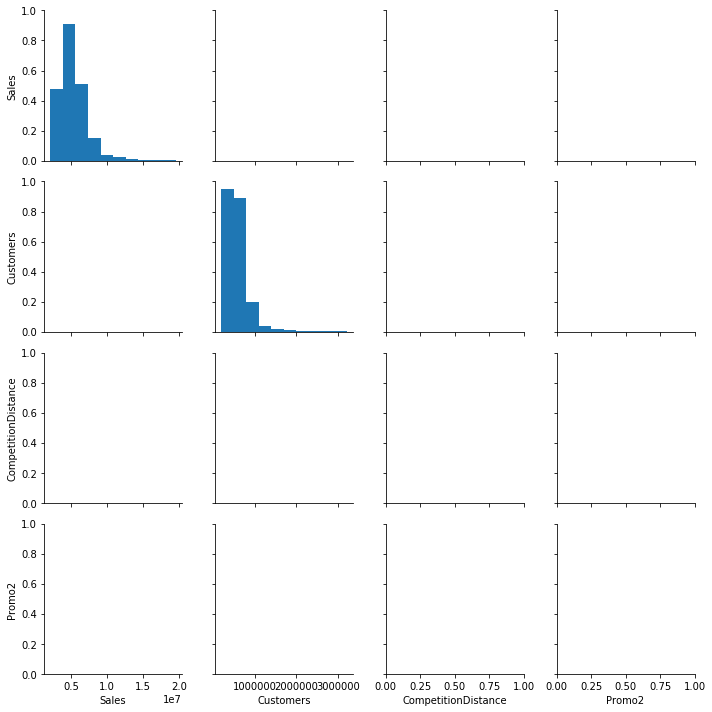

In [15]:
mergedtable = pd.merge(trainsumbystore, store, on='Store')
mergedtable
#sns.lmplot(x= 'CompetitionDistance', y='Sales', data = mergedtable, hue = 'StoreType', col = 'Promo2')

sns.pairplot(mergedtable[['Sales','Customers','StoreType','Assortment','CompetitionDistance', 'Promo2']])

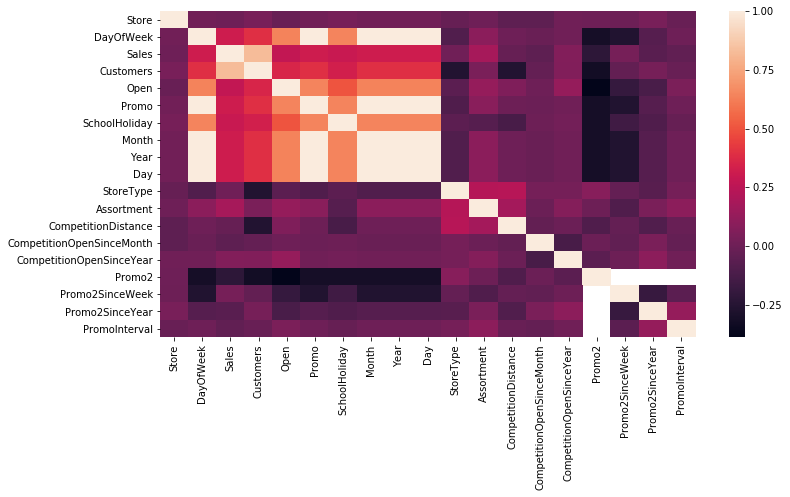

In [17]:
m = mergedtable.rank()
m = m.corr()
plt.figure(figsize = (12,6))
sns.heatmap(m)

In [20]:
m[['CompetitionDistance','Sales']].corr(method='pearson', min_periods=1)

,CompetitionDistance,Sales
CompetitionDistance,1.000000,-0.268875
Sales,-0.268875,1.000000


In [70]:
mergedtable = pd.merge(trainsumbystore, store, on='Store')
mergedtable.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,Year,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3766,3716854,440523,781.0,360.0,813.0,193.0,5616,1897035,14796,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3766,3883858,457855,784.0,360.0,813.0,167.0,5616,1897035,14796,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,3766,5408261,584310,779.0,360.0,813.0,170.0,5616,1897035,14796,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,3766,7556507,1036254,784.0,360.0,813.0,173.0,5616,1897035,14796,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,3766,3642818,418588,779.0,360.0,813.0,172.0,5616,1897035,14796,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [24]:
mergedtable[['CompetitionDistance']].min()

CompetitionDistance    20.0
dtype: float64

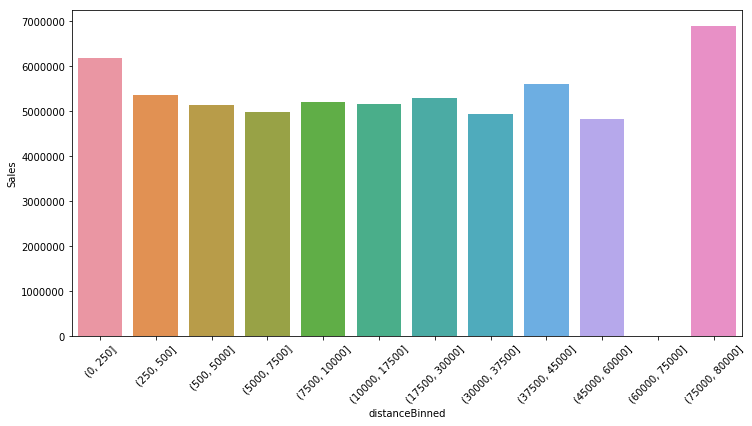

In [69]:
mm = pd.merge(trainsumbystore, store, on='Store')
mm =mm[['CompetitionDistance','Sales']]

bins = [0,250,500, 5000, 7500,10000, 17500, 30000,37500, 45000,60000,75000, 80000]

mm['distanceBinned'] = pd.cut(mm['CompetitionDistance'], bins)

mmbinned = mm[['distanceBinned','Sales']]

mmbinned = mmbinned.groupby('distanceBinned').mean().reset_index()
mmbinned

plt.figure(figsize = (12,6))
plt.xticks(rotation=45)
sns.barplot(x='distanceBinned', y='Sales', data = mmbinned)

In [85]:
dd = pd.merge(trainsumbystore, store, on='Store')
dd =dd[['PromoInterval','Sales','StoreType']].dropna()
dd.groupby(['PromoInterval','StoreType']).mean().reset_index()

,PromoInterval,StoreType,Sales
0,"Feb,May,Aug,Nov",a,4.836332e+06
1,"Feb,May,Aug,Nov",b,5.255773e+06
2,"Feb,May,Aug,Nov",c,4.261732e+06
3,"Feb,May,Aug,Nov",d,5.047399e+06
4,"Jan,Apr,Jul,Oct",a,4.899869e+06
5,"Jan,Apr,Jul,Oct",b,8.844581e+06
6,"Jan,Apr,Jul,Oct",c,4.521804e+06
7,"Jan,Apr,Jul,Oct",d,4.827454e+06
8,"Mar,Jun,Sept,Dec",a,4.850434e+06
9,"Mar,Jun,Sept,Dec",b,4.105679e+06


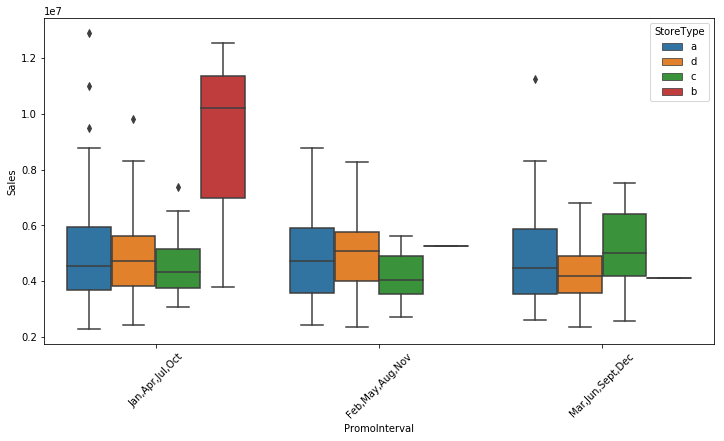

In [88]:
plt.figure(figsize = (12,6))
plt.xticks(rotation=45)
sns.boxplot(x='PromoInterval', y='Sales', data = dd, hue= 'StoreType')